# Mushrooms- General Public

                                                                               {'Author': 'Justin Tung', 
                                                                                'Professor': 'Uhe',
                                                                                'Class': 'IS445 (Data Visualization)',
                                                                                'Semester': 'Fall 2023'
                                                                                'Project': 'Final'}

Dataset is from The Audubon Society Field Guide to North American Mushrooms, licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license. This allows for the sharing and adaptation of the datasets for any purpose, provided that the appropriate credit is given. It can be found here: https://archive.ics.uci.edu/dataset/73/mushroom 


In [1]:
# Import necessary packages
import os.path
import os
import sys
from PIL import Image
from IPython.display import display
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import rcParams
import plotly.graph_objects as go
from webcolors import hex_to_rgb

In [2]:
sys.path.append('data/functions')  # create a path to a function file to keep things neat!
from IS445_Tung_Justin_Functions import (zero_out, 
                                            make_mushroom_bar, 
                                            find_mode, make_donut_chart, 
                                            numeralize_categories, 
                                            convert_color, 
                                            create_sankey)

--------------------------------------------------------
# Introduction
The Audubon Society is a non-profit organization that is focused on conservation and environmental efforts, primarily for the protection of birds. It has roots stretching back to 1896, and was named after the naturalist and ornithologist, John James Audubon*, whose paintings of birds in their habitats were some of the most exotic and vivid of the time.

In 1934, The Audubon Society, which had been incorporated as a national organization at this point, begain publishing field guides with the publisher Alfred A. Knopf. These covered not just birds, but other aspects of nature as well. In 1981, The National Audubon Society published their first Field Guide to North American Mushrooms. With 928 pages and hundreds of descriptions and photographs of different mushrooms, this book quickly became the standard field guide for the both professional and amature mycologists alike.

Sources:

    https://www.audubon.org/about/history-audubon-and-waterbird-conservation
    https://catalog.loc.gov/vwebv/search?searchCode=LCCN&searchArg=81080827&searchType=1&permalink=y
    https://www.worldcat.org/title/1005170538

This dataset contains 8416 lines of information pertaining to different attributes of different species of mushrooms.

This is the official attribution, notes, and documentation from the file itself.

In [3]:
with open('data/mushroom/agaricus-lepiota.names', 'r') as text:  # prints a readme
    print(text.read())

1. Title: Mushroom Database

2. Sources: 
    (a) Mushroom records drawn from The Audubon Society Field Guide to North
        American Mushrooms (1981). G. H. Lincoff (Pres.), New York: Alfred
        A. Knopf
    (b) Donor: Jeff Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)
    (c) Date: 27 April 1987

3. Past Usage:
    1. Schlimmer,J.S. (1987). Concept Acquisition Through Representational
       Adjustment (Technical Report 87-19).  Doctoral disseration, Department
       of Information and Computer Science, University of California, Irvine.
       --- STAGGER: asymptoted to 95% classification accuracy after reviewing
           1000 instances.
    2. Iba,W., Wogulis,J., & Langley,P. (1988).  Trading off Simplicity
       and Coverage in Incremental Concept Learning. In Proceedings of 
       the 5th International Conference on Machine Learning, 73-79.
       Ann Arbor, Michigan: Morgan Kaufmann.  
       -- approximately the same results with their HILLARY algorithm    
    3. In 

In [4]:
df = pd.read_csv('data/mushroom/expanded.csv')
df = df.apply(lambda x: x.astype(str).str.lower())
sz = os.path.getsize(r'data/mushroom/expanded.csv')
shape = df.shape
print(f'The mushroom database is {sz} bytes, and has {shape[0]} rows and {shape[1]} columns.')

The mushroom database is 1265152 bytes, and has 8416 rows and 23 columns.


This dataset contains 8416 lines of information pertaining to different attributes of different species of mushrooms. The goal of these visualizations is to not only accurately portray the data, but also to do so by incorporating the physical form of the mushroom.

In [5]:
df

edible cap-shape cap-surface cap-color bruises%3F    odor  \
0     edible    convex      smooth     white    bruises  almond   
1     edible    convex      smooth     white    bruises  almond   
2     edible    convex      smooth     white    bruises  almond   
3     edible    convex      smooth     white    bruises  almond   
4     edible    convex      smooth     white    bruises  almond   
...      ...       ...         ...       ...        ...     ...   
8411  edible   knobbed      smooth     brown         no    none   
8412  edible   knobbed      smooth     brown         no    none   
8413  edible   knobbed      smooth     brown         no    none   
8414  edible   knobbed      smooth     brown         no    none   
8415  edible   knobbed      smooth     brown         no    none   

     gill-attachment gill-spacing gill-size gill-color  ...  \
0               free      crowded    narrow      white  ...   
1               free      crowded    narrow      white  ...   
2               free      crowded    narrow       pink  ...   
3               free      crowded    narrow       pink  ...   
4               free      crowded    narrow      brown  ...   
...              ...          ...       ...        ...  ...   
8411        attached        close     broad      brown  ...   
8412        attached        close     broad      brown  ...   
8413        attached        close     broad      brown  ...   
8414        attached        close     broad      brown  ...   
8415        attached        close     broad      brown  ...   

     stalk-surface-below-ring stalk-color-above-ring stalk-color-below-ring  \
0                      smooth                  white                  white   
1                      smooth                  white                  white   
2                      smooth                  white                  white   
3                      smooth                  white                  white   
4                      smooth                  white                  white   
...                       ...                    ...                    ...   
8411                   smooth                 orange                 orange   
8412                   smooth                 orange                 orange   
8413                   smooth                 orange                 orange   
8414                   smooth                 orange                 orange   
8415                   smooth                 orange                 orange   

     veil-type veil-color ring-number ring-type spore-print-color population  \
0      partial      white         one   pendant            purple    several   
1      partial      white         one   pendant             brown    several   
2      partial      white         one   pendant            purple    several   
3      partial      white         one   pendant             brown    several   
4      partial      white         one   pendant            purple    several   
...        ...        ...         ...       ...               ...        ...   
8411   partial      brown         one   pendant             brown  clustered   
8412   partial      brown         one   pendant            orange    several   
8413   partial      brown         one   pendant            orange  clustered   
8414   partial      brown         one   pendant              buff    several   
8415   partial      brown         one   pendant              buff  clustered   

     habitat  
0      woods  
1      woods  
2      woods  
3      woods  
4      woods  
...      ...  
8411  leaves  
8412  leaves  
8413  leaves  
8414  leaves  
8415  leaves  

[8416 rows x 23 columns]


------------------------------------------
# 1. Odor and Ediblity
This groups the dataset firstly by odor, then secondly by ediblity.

In [6]:
df_eating = df.groupby(['odor', 'edible']).count().reset_index()
df_eating = df_eating.iloc[:, :4]
df_eating = df_eating.rename(columns={'cap-shape': 'edible_count', 'cap-surface': 'poisonous_count'})
df_eating = zero_out(df_eating, 'poisonous_count', 'edible', 0)
df_eating = zero_out(df_eating, 'edible_count', 'poisonous', 0)
df_eating = zero_out(df_eating, 'edible_count', 'edible', (df_eating['edible_count'] * -1))
df_eating['poisonous_count'].iloc[6] = df_eating['poisonous_count'].iloc[7]  # merges the two 'None' rows
df_eating = df_eating.drop(7)  # drops extra 'None' row
df_eating

C:\Users\jct3368\AppData\Local\Temp\ipykernel_22352\1608442308.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eating['poisonous_count'].iloc[6] = df_eating['poisonous_count'].iloc[7]  # merges the two 'None' rows


odor     edible  edible_count  poisonous_count
0    almond     edible          -400                0
1     anise     edible          -400                0
2  creosote  poisonous             0              192
3     fishy  poisonous             0              576
4      foul  poisonous             0             2160
5     musty  poisonous             0               48
6      none     edible         -3688              120
8   pungent  poisonous             0              256
9     spicy  poisonous             0              576

D:\uhe_class\Final Project\data/functions\IS445_Tung_Justin_Functions.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(abs(ax.get_yticks()))


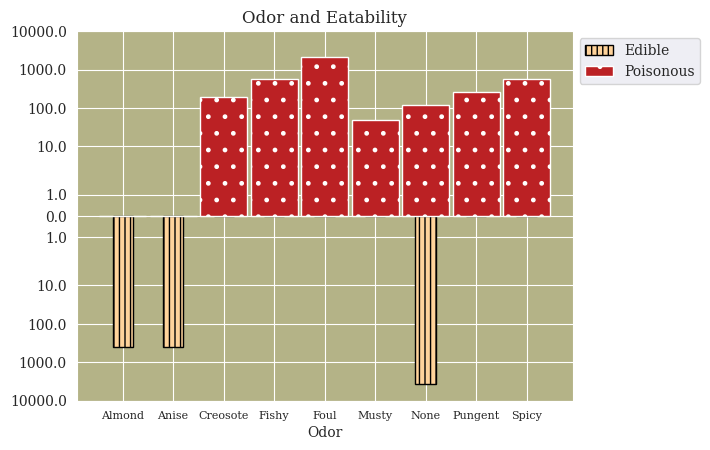

In [7]:
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['TeX Gyre Bonum'] + rcParams['font.serif']

edible = df_eating['edible_count'].tolist()
poisonous = df_eating['poisonous_count'].tolist()
r = [0, 10, 20, 30, 40, 50, 60, 70, 80]
names = ['Almond', 'Anise', 'Creosote', 'Fishy', 'Foul', 'Musty', 'None', 'Pungent', 'Spicy']

make_mushroom_bar(edible, poisonous, r, names)

Note that the scale here is logarithmic, not linear. This was done to maintain as much of the visual mushroom form as possible, and still helps to answer the question of whether or not a particularly odored mushroom is safe to eat or not. To that end, the graph works since that information is still represented in the visual proportion between the mushroom cap and the mushoorm stem, albeit on a logarithmic scale. 

-----------------------------------------------------------------------

# 2. The Colors of the Mushroom

Many of these fields describe color information. What colors can any given mushroom include?

I first analyze each column of data and create a donut chart that represents the proportions.

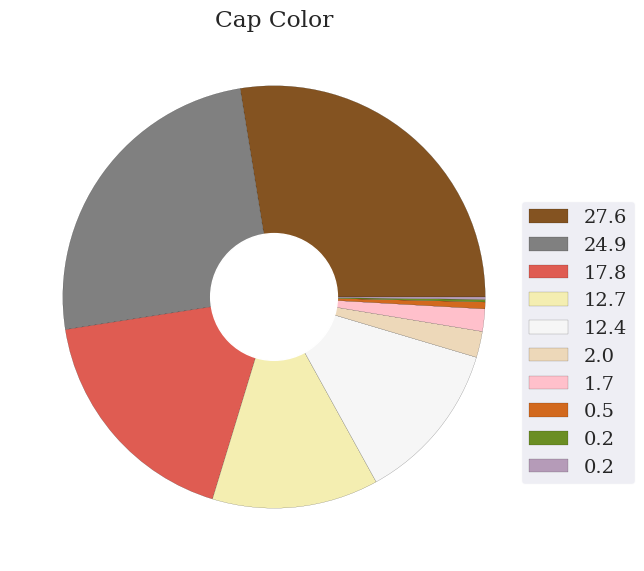

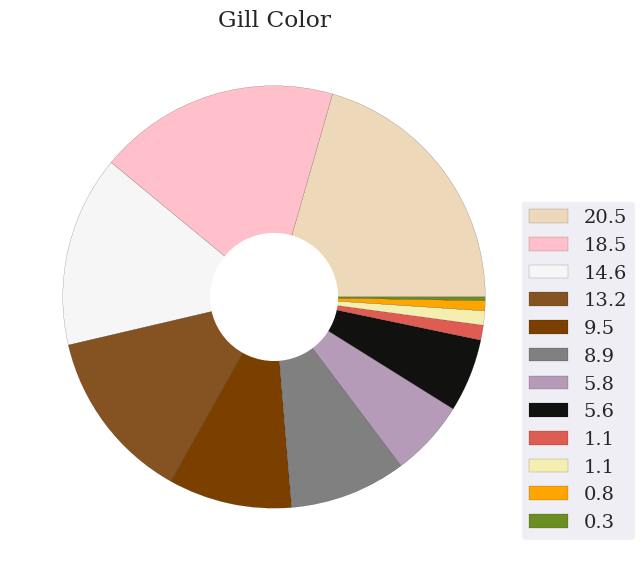

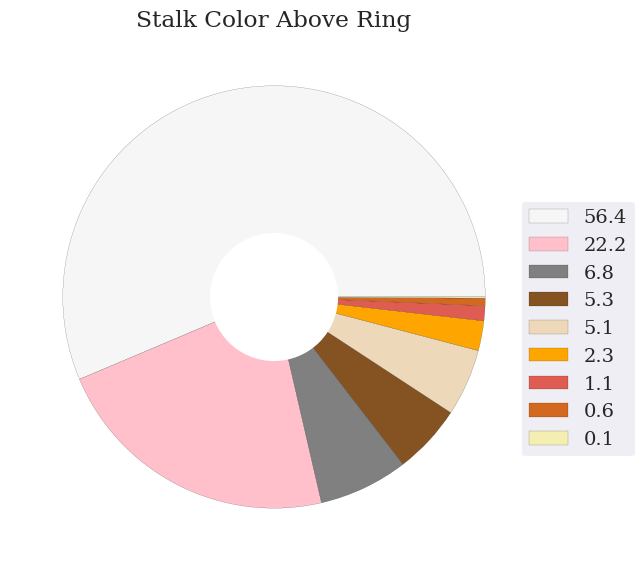

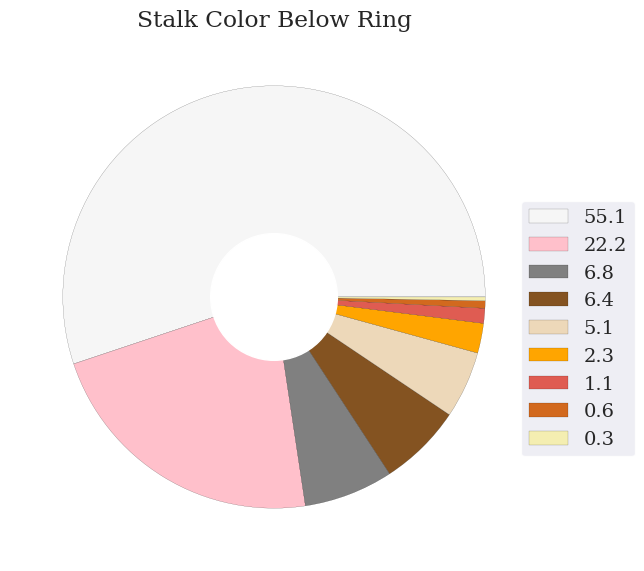

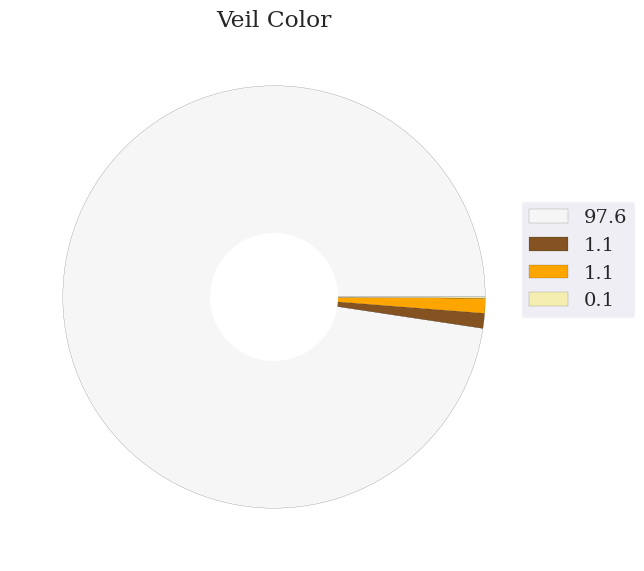

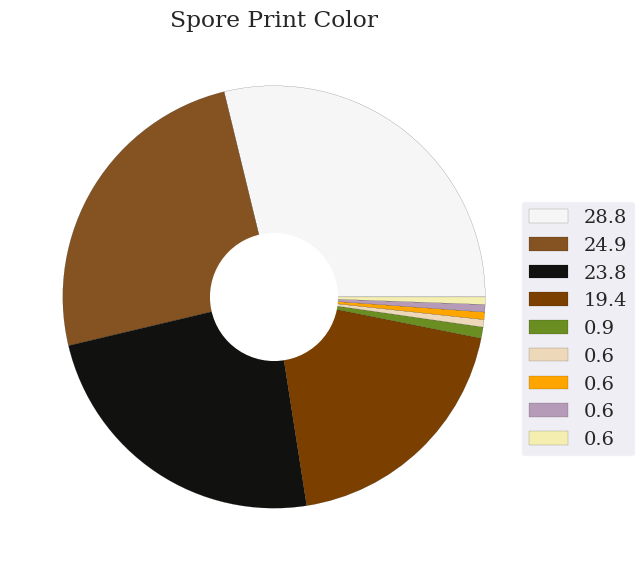

In [8]:
color_columns = ['cap-color',  # isolate the color columns
            'gill-color',
            'stalk-color-above-ring',
            'stalk-color-below-ring',
            'veil-color',
            'spore-print-color']

for color_column in color_columns: 
    df_color = find_mode(df, color_column)
    make_donut_chart(df_color, color_column)

These colors represent the different colors represented on the distribution of colors for different parts of the mushroom.

Here's the graphs compiled together. Note that the numbers are given in percents.

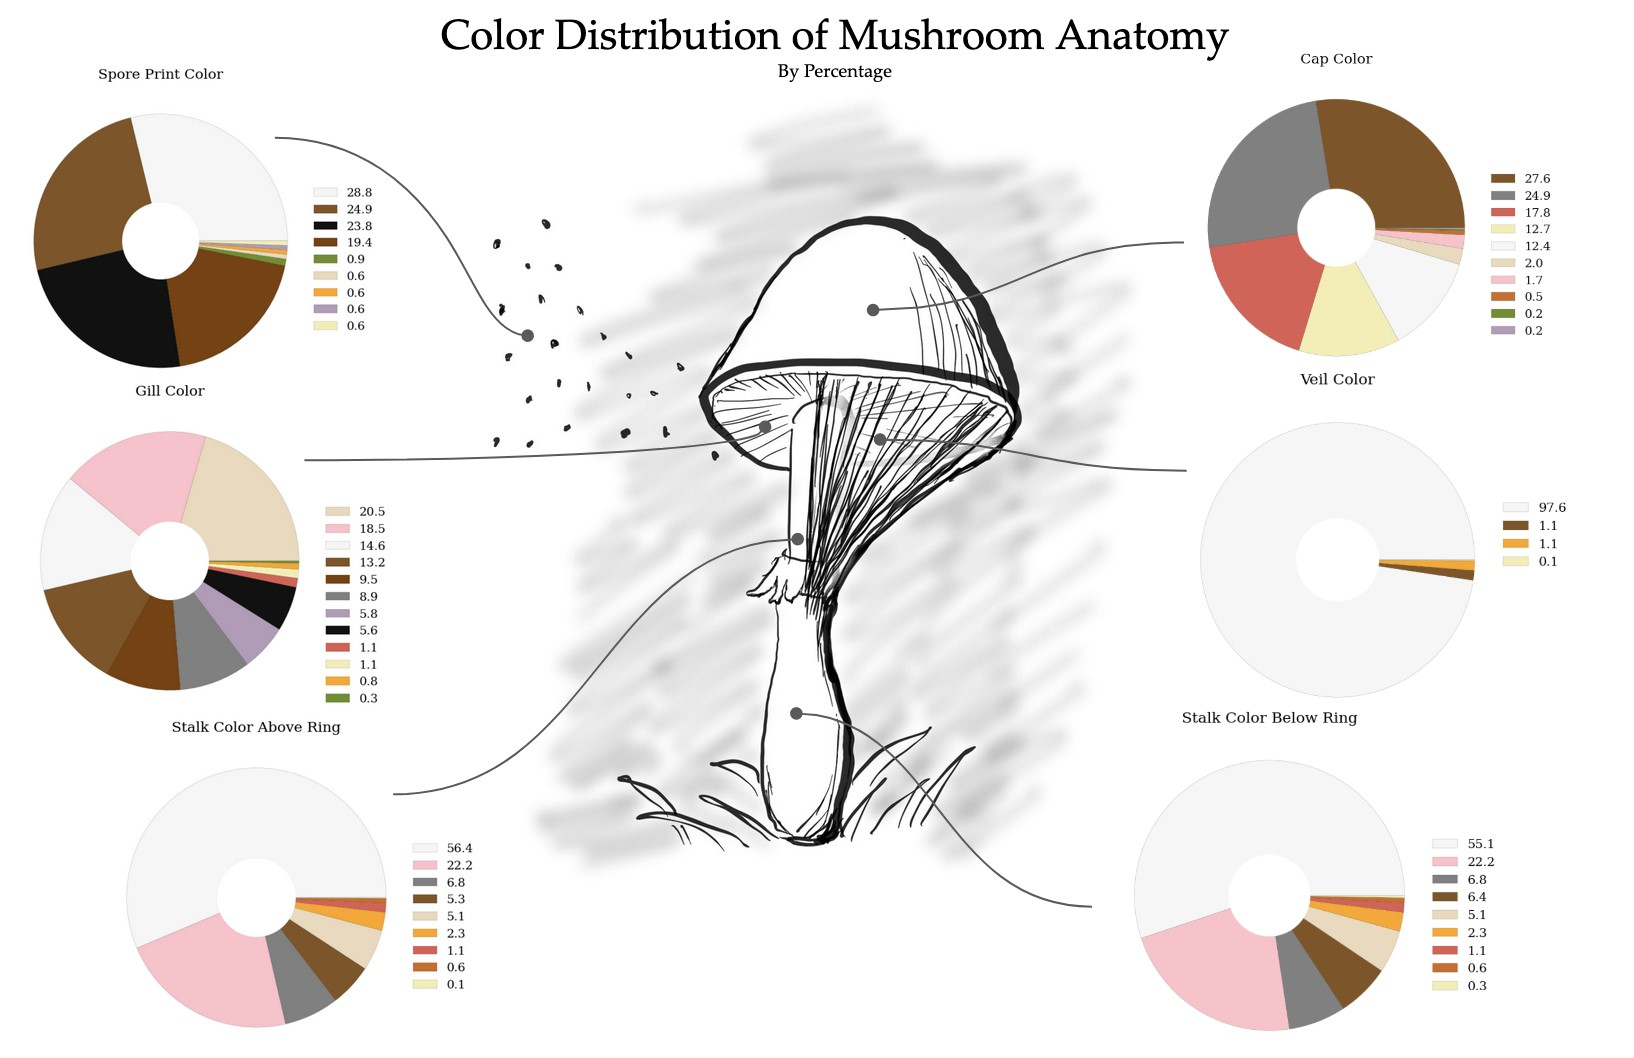

In [9]:
mushroom_img = Image.open('data/diagrams/diagram_title.jpg')
mushroom_img

-----------------------------------------------------------
# 3. Habitat and Growth Patterns
Where are mushrooms and what do they look like? They grow in several different habitats, and can be grouped in several different ways. This information is stored in the "population" and "habitat" columns of the original dataframe.

In [10]:
df_living = df.groupby(['population', 'habitat']).count()
df_living = df_living.iloc[:, 0]
df_living = df_living.to_frame().reset_index()

categories = ['population', 'habitat']
df_living = numeralize_categories(categories, df_living)

color_dict = {6: '#7da337', 7: '#ff9d39', 8: '#451800', 9: '#84240c', 10: '#477436', 11: '#7c7556', 12:'#004656',}
df_living['color'] = df_living['habitat'].map(color_dict) # maps colors onto a new column with a dict
df_living

population  habitat  edible    color
0            0        6     512  #7da337
1            1        7     112  #ff9d39
2            1        8     192  #451800
3            1        9      48  #84240c
4            2        6     272  #7da337
5            2       10     128  #477436
6            3        6     968  #7da337
7            3       10     128  #477436
8            3       11      48  #7c7556
9            3       12     136  #004656
10           3        9      96  #84240c
11           4        6     388  #7da337
12           4        7     744  #ff9d39
13           4       10      36  #477436
14           4       11     808  #7c7556
15           4       12     184  #004656
16           4        9    1904  #84240c
17           5        6     264  #7da337
18           5       11     288  #7c7556
19           5       12      48  #004656
20           5        9    1112  #84240c

By seeing how the mushroom's growth paterns to its habitat, one can know what growth patterns to look for.

In [11]:
color_link = df_living['color']
links = dict(
    source = df_living['population'],
    target = df_living['habitat'],        
    value = df_living['edible'],
    color= convert_color(color_link))
nodes = dict(
    pad = 52,
    thickness = 23,
    line = dict(color = "black", width= 0),
    label = ['Abundant', 'Clustered', 'Numerous', 'Scattered', 'Several', 'Solitary', # 0-5
             'Grasses', 'Leaves', 'Waste', 'Woods', 'Meadows', 'Paths', 'Urban'],  # 6-12
    color = '#f3f0e7',
    x= [0.05, 0.15, 0.07, 0.04, 0.0001, 0.12,  # Because this diagram is vertical, x and y here are flipped.
         0.98, 0.95, 0.9, 1, 0.96, 0.92, 0.88],
    y= [1.03, 0.0001, 0.15, 0.37, 0.72, 1.25,
        0.47, 0.31, 0.21, 0.74, 0.91, 0.99, 1.07])

create_sankey(nodes, links)

-----------------------------------------------
\* It is very worth noting that John James Audubon was, in many ways, contradictory. Although he is known for the ways he portrayed the stunning, seemingly unadulterated beautify, magnificnece, and dignity of birds, he gave no such recognition to Black people. A staunch white supremacist, anti-abolitionist and slaveholder, Audubon also opposed liberation efforts on his home island of Haiti (then called Saint Domingue), where he was born as an illegitimate son of a French sea captain and a Jeanne Rabin. Rabin was a Creole woman enslaved from the Congo and used as a mistress. In his life, Audubon shows strong signs of shame associated with this lineage, and often lied that his true mother was a Spanish woman.

In his own writings, Audubon fabricates an encounter with an escaped slave family, particularly a black man with a rifle. He incites fear about armed black men and describes how he only managed to survive at their mercy, before selling them back to the plantation they previously escaped from. This story was published three years after Turner's rebellion, and was clearly meant to fearmonger about the prospect of the danger of unenslaved Black people, especially armed men, while victimizing the white, land-owning identities that he belonged to.

The National Audubon Society, as an organization, has made efforts to recognize the problematic nature of its eponymous inspiration, and has made (at least public) commitment to antiracism and equity. The Society emphasizes that it was founded by a group of women who wanted to prevent the slaughter of birds for their decorative feathers, not Audubon himself. However, in March 2023, The National Audubon Society's board of directors decided to keep the name "Audubon", to much criticism from the public, leaders, members, and chapters. Some of these chapters have decided to change their individual names or otherwise dissociate from the name "Audubon". 

More broadly, race has been a big issue in Naturalism. This is exemplified in J. Drew Lanham's 2013 article "9 Rules for the Black Birdwatcher" which includes advice such as to never bird in a hoodie, never bird at night, and to always carry three forms of identification to "convince the cops, FBI, Homeland Security, and the flashlight-toting security guard that you’re not a terrorist or escaped convict."

Sources:

    https://www.audubon.org/news/the-myth-john-james-audubon
    https://aaregistry.org/story/artist-of-nature-john-audubon-born/
    https://www.audubon.org/magazine/fall-2020/revealing-past-create-future
    https://www.npr.org/2023/03/18/1164293652/audubon-faces-a-backlash-after-deciding-to-keep-name-that-evokes-a-racist-enslav
    https://orionmagazine.org/article/9-rules-for-the-black-birdwatcher/